In [2]:
import datetime, warnings, scipy
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
flightsinfo = pd.read_csv("/content/Sample_Final_Data.csv")

In [4]:
list(flightsinfo.columns)

['FlightDate',
 'Airline',
 'Origin',
 'Dest',
 'Cancelled',
 'Diverted',
 'CRSDepTime',
 'DepTime',
 'DepDelayMinutes',
 'DepDelay',
 'ArrTime',
 'ArrDelayMinutes',
 'AirTime',
 'CRSElapsedTime',
 'ActualElapsedTime',
 'Distance',
 'Year',
 'Quarter',
 'Month',
 'DayofMonth',
 'DayOfWeek',
 'Operating_Airline',
 'OriginAirportID',
 'OriginCityName',
 'OriginStateName',
 'DestAirportID',
 'DestCityName',
 'DestState',
 'DestStateName',
 'DepDel15',
 'DepartureDelayGroups',
 'TaxiOut',
 'WheelsOff',
 'WheelsOn',
 'TaxiIn',
 'CRSArrTime',
 'ArrDelay',
 'ArrDel15',
 'ArrivalDelayGroups',
 'DistanceGroup',
 'Delayed']

In [5]:
airlines = pd.read_csv("/content/Airlines.csv")

In [6]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1570 non-null   object
 1   Description  1571 non-null   object
dtypes: object(2)
memory usage: 24.7+ KB


In [7]:
flightsinfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48417 entries, 0 to 48416
Data columns (total 41 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   FlightDate            48417 non-null  object 
 1   Airline               48417 non-null  object 
 2   Origin                48417 non-null  object 
 3   Dest                  48417 non-null  object 
 4   Cancelled             48417 non-null  bool   
 5   Diverted              48417 non-null  bool   
 6   CRSDepTime            48417 non-null  int64  
 7   DepTime               48417 non-null  float64
 8   DepDelayMinutes       48417 non-null  float64
 9   DepDelay              48417 non-null  float64
 10  ArrTime               48417 non-null  float64
 11  ArrDelayMinutes       48417 non-null  float64
 12  AirTime               48417 non-null  float64
 13  CRSElapsedTime        48417 non-null  float64
 14  ActualElapsedTime     48417 non-null  float64
 15  Distance           

In [8]:
flightsinfo.shape

(48417, 41)

In [9]:
flightsinfo.describe()

,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,ArrTime,ArrDelayMinutes,AirTime,CRSElapsedTime,ActualElapsedTime,Distance,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,Delayed
count,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,...,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000,48417.000000
mean,1325.437966,1329.203441,12.477931,8.971085,1467.702212,12.602144,109.663403,139.533470,133.927236,786.707830,...,16.709131,1353.070388,1462.572278,7.554702,1487.881984,3.364025,0.173410,-0.299564,3.620443,0.173410
std,483.369534,495.888253,45.203843,46.319279,526.526671,45.085852,69.738722,71.513451,71.406109,589.161553,...,9.420085,497.055208,522.533539,6.147338,508.477396,48.588698,0.378605,2.298430,2.313651,0.378605
min,1.000000,1.000000,0.000000,-58.000000,1.000000,0.000000,8.000000,20.000000,18.000000,31.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,-74.000000,0.000000,-2.000000,1.000000,0.000000
25%,915.000000,917.000000,0.000000,-6.000000,1054.000000,0.000000,59.000000,88.000000,82.000000,356.000000,...,11.000000,933.000000,1050.000000,4.000000,1106.000000,-16.000000,0.000000,-2.000000,2.000000,0.000000
50%,1320.000000,1325.000000,0.000000,-3.000000,1507.000000,0.000000,92.000000,121.000000,117.000000,629.000000,...,14.000000,1338.000000,1503.000000,6.000000,1515.000000,-7.000000,0.000000,-1.000000,3.000000,0.000000
75%,1730.000000,1738.000000,5.000000,5.000000,1910.000000,6.000000,139.000000,170.000000,164.000000,1024.000000,...,19.000000,1752.000000,1904.000000,9.000000,1915.000000,6.000000,0.000000,0.000000,5.000000,0.000000
max,2359.000000,2400.000000,2532.000000,2532.000000,2400.000000,2522.000000,641.000000,685.000000,689.000000,5095.000000,...,168.000000,2400.000000,2400.000000,127.000000,2400.000000,2522.000000,1.000000,12.000000,11.000000,1.000000


In [10]:
flightsinfo.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,Delayed
0,2018-03-24,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855.0,0.0,-5.0,...,6.0,1901.0,1920.0,7.0,1935,-8.0,0.0,-1.0,1,0
1,2018-04-23,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111.0,16.0,16.0,...,22.0,2133.0,2253.0,23.0,2249,27.0,1.0,1.0,2,1
2,2018-02-16,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728.0,38.0,38.0,...,16.0,1744.0,1859.0,4.0,1820,43.0,1.0,2.0,3,1
3,2018-12-07,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851.0,6.0,6.0,...,9.0,1900.0,2207.0,7.0,2215,-1.0,0.0,-1.0,4,0
4,2018-06-03,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201.0,1.0,1.0,...,7.0,1208.0,1637.0,2.0,1655,-16.0,0.0,-2.0,6,0


In [11]:
flightsinfo

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,TaxiOut,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,Delayed
0,2018-03-24,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,1855.0,0.0,-5.0,...,6.0,1901.0,1920.0,7.0,1935,-8.0,0.0,-1.0,1,0
1,2018-04-23,Endeavor Air Inc.,BOS,PIT,False,False,2055,2111.0,16.0,16.0,...,22.0,2133.0,2253.0,23.0,2249,27.0,1.0,1.0,2,1
2,2018-02-16,Southwest Airlines Co.,HOU,ECP,False,False,1650,1728.0,38.0,38.0,...,16.0,1744.0,1859.0,4.0,1820,43.0,1.0,2.0,3,1
3,2018-12-07,Southwest Airlines Co.,MDW,MCO,False,False,1845,1851.0,6.0,6.0,...,9.0,1900.0,2207.0,7.0,2215,-1.0,0.0,-1.0,4,0
4,2018-06-03,Southwest Airlines Co.,LAS,LIT,False,False,1200,1201.0,1.0,1.0,...,7.0,1208.0,1637.0,2.0,1655,-16.0,0.0,-2.0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48412,2022-06-02,United Air Lines Inc.,CMH,IAH,False,False,635,633.0,0.0,-2.0,...,13.0,646.0,758.0,7.0,825,-20.0,0.0,-2.0,4,0
48413,2022-05-28,Endeavor Air Inc.,MOB,ATL,False,False,913,912.0,0.0,-1.0,...,20.0,932.0,1122.0,7.0,1133,-4.0,0.0,-1.0,2,0
48414,2022-07-13,SkyWest Airlines Inc.,MSP,GRB,False,False,2120,2120.0,0.0,0.0,...,15.0,2135.0,2216.0,4.0,2227,-7.0,0.0,-1.0,2,0
48415,2022-02-09,SkyWest Airlines Inc.,OMA,SLC,False,False,815,808.0,0.0,-7.0,...,11.0,819.0,944.0,15.0,1008,-9.0,0.0,-1.0,4,0


In [12]:
airlinecompanies = airlines.set_index('Code')['Description'].to_dict()

In [46]:
airlinecompanies

{'02Q': 'Titan Airways',
 '04Q': 'Tradewind Aviation',
 '05Q': 'Comlux Aviation, AG',
 '06Q': 'Master Top Linhas Aereas Ltd.',
 '07Q': 'Flair Airlines Ltd.',
 '09Q': 'Swift Air, LLC',
 '0BQ': 'DCA',
 '0CQ': 'ACM AIR CHARTER GmbH',
 '0GQ': 'Inter Island Airways, d/b/a Inter Island Air',
 '0HQ': 'Polar Airlines de Mexico d/b/a Nova Air',
 '0J': 'JetClub AG',
 '0JQ': 'Vision Airlines',
 '0LQ': 'Metropix UK, LLP.',
 '0MQ': 'Multi-Aero, Inc. d/b/a Air Choice One',
 '0OQ': 'Open Skies',
 '0Q': 'Flying Service N.V.',
 '0QQ': 'TAG Aviation (UK) Ltd.',
 '0RQ': 'TAG Aviation Espana S.L.',
 '0TQ': 'Corporatejets, XXI',
 '0UQ': 'Comlux Malta, Ltd.',
 '0VQ': 'Ocean Sky (UK) Limited',
 '0WQ': 'Avjet Corporation',
 '0YQ': 'Comlux Malta Ltd.',
 '10Q': 'Swiss Air Ambulance',
 '12Q': 'Unijet',
 '13Q': 'Chartright Air Inc.',
 '14Q': 'London Air Services Limited',
 '15Q': 'Air Alsie A/S',
 '16': 'PSA Airlines Inc.',
 '17': 'Piedmont Airlines',
 '17Q': 'Albinati Aeronautics SA',
 '1AQ': 'Charter Air Transp

<ipython-input-14-2cfe0e001e12>:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels)


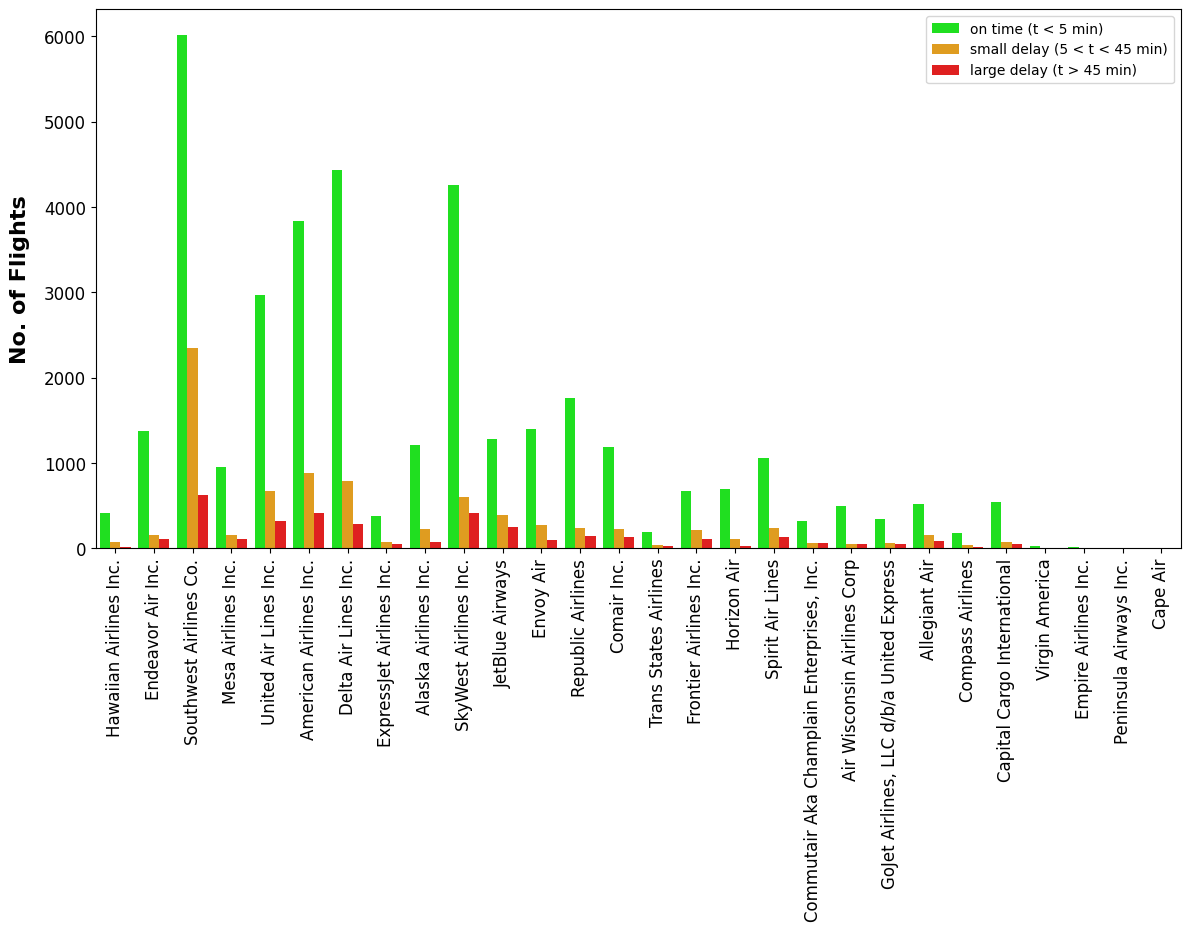

In [14]:
delay_type = lambda x:((0,1)[x > 5],2)[x > 45]
flightsinfo['DELAY_LEVEL'] = flightsinfo['DepDelay'].apply(delay_type)

fig = plt.figure(1, figsize=(14,7))
ax = sns.countplot(x="Airline", hue='DELAY_LEVEL', data=flightsinfo, palette= ["#00FF00","#FFA500","#FF0000"])

labels = ax.get_xticklabels()
ax.set_xticklabels(labels)
plt.setp(ax.get_yticklabels(), fontsize=12, weight = 'normal', rotation = 0);
plt.setp(ax.get_xticklabels(), fontsize=12, weight = 'normal', rotation = 90);
ax.xaxis.label.set_visible(False)
plt.ylabel('No. of Flights', fontsize=16, weight = 'bold', labelpad=10)

L = plt.legend()
L.get_texts()[0].set_text('on time (t < 5 min)')
L.get_texts()[1].set_text('small delay (5 < t < 45 min)')
L.get_texts()[2].set_text('large delay (t > 45 min)')
plt.show()

<ipython-input-15-9a12cc554a9b>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Airline", y="DepDelay", data=flightsinfo, color="orange", ci=None)
<ipython-input-15-9a12cc554a9b>:3: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  ax = sns.barplot(x="Airline",y="ArrDelay",  data=flightsinfo, color="b", hatch = 'X',
<ipython-input-15-9a12cc554a9b>:6: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels,rotation=90)


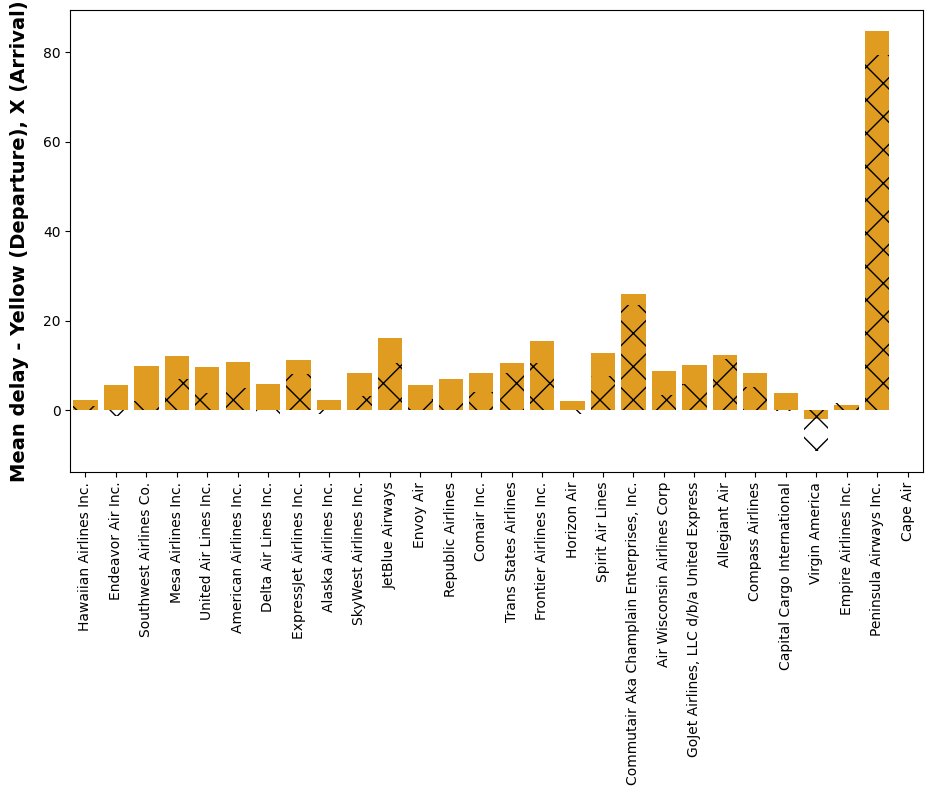

In [15]:
fig = plt.figure(1, figsize=(11,6))
ax = sns.barplot(x="Airline", y="DepDelay", data=flightsinfo, color="orange", ci=None)
ax = sns.barplot(x="Airline",y="ArrDelay",  data=flightsinfo, color="b", hatch = 'X',
                 alpha = 0.0, ci=None)
labels = ax.get_xticklabels()
ax.set_xticklabels(labels,rotation=90)
ax.xaxis.label.set_visible(False)
plt.ylabel('Mean delay - Yellow (Departure), X (Arrival)',
           fontsize=14, weight = 'bold', labelpad=10);

In [16]:
import folium
from collections import OrderedDict

# Flight counts per airport (example)
flightcount = flightsinfo['OriginStateName'].value_counts()

# Initialize the map (centered at a specific latitude and longitude)
m = folium.Map(location=[37.7749, -122.4194], zoom_start=4)  # Example: centered on San Francisco

# Define color and size ranges
colors = ['purple', 'green', 'orange', 'yellow', 'red', 'lightblue']
size = [1, 100, 1000, 10000, 100000, 1000000]
labels = ["1 to 100", "100 to 1000", "1000 to 10000", "10000 to 100000", "100000 to 1000000"]

# Iterate through airport data and add CircleMarkers to the map
for index, (code, y, x) in airport[['Code', 'LATITUDE', 'LONGITUDE']].iterrows():
    # Determine the size category for each airport based on flight count
    isize = [i for i, val in enumerate(size) if val < flightcount[code]]
    ind = isize[-1]

    # Add a CircleMarker with a size and color based on flight count
    folium.CircleMarker(
        location=[y, x],
        radius=(ind + 5),  # Set the size of the circle marker
        color=colors[ind],
        fill=True,
        fill_color=colors[ind],
        fill_opacity=0.6,
        popup=f"Airport: {code}, Flights: {flightcount[code]}"
    ).add_to(m)

# Display the map
m


NameError: name 'airport' is not defined

In [17]:
airlines

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.
...,...,...
1566,ZW,Air Wisconsin Airlines Corp
1567,ZX,Air Georgian
1568,ZX (1),Airbc Ltd.
1569,ZY,Atlantic Gulf Airlines


In [18]:
flightsinfo_NULL = flightsinfo.isnull().sum()*100/flightsinfo.shape[0]
flightsinfo_NULL

,0
FlightDate,0.0
Airline,0.0
Origin,0.0
Dest,0.0
Cancelled,0.0
Diverted,0.0
CRSDepTime,0.0
DepTime,0.0
DepDelayMinutes,0.0
DepDelay,0.0


In [21]:
flightsinfo_NULL.shape

(42,)

In [25]:
flightsinfo_NULL.isnull().sum()

0

In [27]:
flightsinfo_NULL.info()

<class 'pandas.core.series.Series'>
Index: 42 entries, FlightDate to DELAY_LEVEL
Series name: None
Non-Null Count  Dtype  
--------------  -----  
42 non-null     float64
dtypes: float64(1)
memory usage: 1.7+ KB


In [30]:
airlines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1571 entries, 0 to 1570
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Code         1570 non-null   object
 1   Description  1571 non-null   object
dtypes: object(2)
memory usage: 24.7+ KB


In [34]:
flightsinfo.DepTime

,DepTime
0,1855.0
1,2111.0
2,1728.0
3,1851.0
4,1201.0
...,...
48412,633.0
48413,912.0
48414,2120.0
48415,808.0


# New SectionThe times are not in the correct format so i will transform them into HH:MM format


In [35]:
def CreateTimeFormatted(hours):
        if hours == 2400:
            hours = 0
        else:
            hours = "{0:04d}".format(int(hours))
            Hourmin = datetime.time(int(hours[0:2]), int(hours[2:4]))
            return Hourmin

In [37]:
flightsinfo['DepTime'] =flightsinfo['CRSDepTime'].apply(CreateTimeFormatted)
flightsinfo['DepTime']

,DepTime
0,19:00:00
1,20:55:00
2,16:50:00
3,18:45:00
4,12:00:00
...,...
48412,06:35:00
48413,09:13:00
48414,21:20:00
48415,08:15:00


In [54]:
flightsinfo.head()

,FlightDate,Airline,Origin,Dest,Cancelled,Diverted,CRSDepTime,DepTime,DepDelayMinutes,DepDelay,...,WheelsOff,WheelsOn,TaxiIn,CRSArrTime,ArrDelay,ArrDel15,ArrivalDelayGroups,DistanceGroup,Delayed,DELAY_LEVEL
0,2018-03-24,Hawaiian Airlines Inc.,LIH,HNL,False,False,1900,19:00:00,0.0,-5.0,...,1901.0,1920.0,7.0,1935,-8.0,0.0,-1.0,1,0,0
1,2018-04-23,Endeavor Air Inc.,BOS,PIT,False,False,2055,20:55:00,16.0,16.0,...,2133.0,2253.0,23.0,2249,27.0,1.0,1.0,2,1,1
2,2018-02-16,Southwest Airlines Co.,HOU,ECP,False,False,1650,16:50:00,38.0,38.0,...,1744.0,1859.0,4.0,1820,43.0,1.0,2.0,3,1,1
3,2018-12-07,Southwest Airlines Co.,MDW,MCO,False,False,1845,18:45:00,6.0,6.0,...,1900.0,2207.0,7.0,2215,-1.0,0.0,-1.0,4,0,1
4,2018-06-03,Southwest Airlines Co.,LAS,LIT,False,False,1200,12:00:00,1.0,1.0,...,1208.0,1637.0,2.0,1655,-16.0,0.0,-2.0,6,0,0


In [49]:
import pandas as pd

df = flightsinfo

# Step 2: Identify categorical columns
# Assuming all object (string) columns are categorical
categorical_columns = df.select_dtypes(include=['object']).columns

# Step 3: Apply one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

# Step 4: Save or use the transformed DataFrame
print(df_encoded.head())  # Check the transformed DataFrame
df_encoded.to_csv('encoded_file.csv', index=False)  # Save to a new CSV file

   Cancelled  Diverted  CRSDepTime  DepDelayMinutes  DepDelay  ArrTime  \
0      False     False        1900              0.0      -5.0   1927.0   
1      False     False        2055             16.0      16.0   2316.0   
2      False     False        1650             38.0      38.0   1903.0   
3      False     False        1845              6.0       6.0   2214.0   
4      False     False        1200              1.0       1.0   1639.0   

   ArrDelayMinutes  AirTime  CRSElapsedTime  ActualElapsedTime  ...  \
0              0.0     19.0            35.0               32.0  ...   
1             27.0     80.0           114.0              125.0  ...   
2             43.0     75.0            90.0               95.0  ...   
3              0.0    127.0           150.0              143.0  ...   
4              0.0    149.0           175.0              158.0  ...   

   DestStateName_Texas  \
0                False   
1                False   
2                False   
3                False  

In [72]:
print(df_encoded.dtypes)

Cancelled                         bool
Diverted                          bool
CRSDepTime                       int64
DepDelayMinutes                float64
DepDelay                       float64
                                ...   
DestStateName_Virginia            bool
DestStateName_Washington          bool
DestStateName_West Virginia       bool
DestStateName_Wisconsin           bool
DestStateName_Wyoming             bool
Length: 4578, dtype: object


In [73]:
df_encoded.columns

Index(['Cancelled', 'Diverted', 'CRSDepTime', 'DepDelayMinutes', 'DepDelay',
       'ArrTime', 'ArrDelayMinutes', 'AirTime', 'CRSElapsedTime',
       'ActualElapsedTime',
       ...
       'DestStateName_Texas',
       'DestStateName_U.S. Pacific Trust Territories and Possessions',
       'DestStateName_U.S. Virgin Islands', 'DestStateName_Utah',
       'DestStateName_Vermont', 'DestStateName_Virginia',
       'DestStateName_Washington', 'DestStateName_West Virginia',
       'DestStateName_Wisconsin', 'DestStateName_Wyoming'],
      dtype='object', length=4578)

In [51]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

In [53]:
le = LabelEncoder()

In [75]:
df_encoded['Airline']= le.fit_transform(df_encoded['Airline'])
df_encoded['Origin'] = le.fit_transform(df_encoded['Origin'])
df_encoded['Dest'] = le.fit_transform(df_encoded['Dest'])
df_encoded['FlightDate'] = le.fit_transform(df_encoded['FlightDate'])

KeyError: 'Airline'

In [60]:
X = flightsinfo.drop(columns=['ArrDel15', 'Delayed'])
X.shape

(48417, 40)

In [62]:
y = flightsinfo['Delayed']
y.head()

,Delayed
0,0
1,1
2,1
3,0
4,0


In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state = 5)

In [65]:
sc1=StandardScaler()
X_train_sc=sc1.fit_transform(X_train)
X_test_sc=sc1.transform(X_test)

TypeError: float() argument must be a string or a real number, not 'datetime.time'